<a href="https://colab.research.google.com/github/uk-2149/uk_ml_prjcts/blob/main/med_expense_predictor0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
from urllib.request import urlretrieve # downloads data using url

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7d8ff0f28c10>)

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
!pip install plotly matplotlib seaborn

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(
    medical_df,
    x='age',
    marginal='box',
    nbins=45,
    title='Age Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [ ]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
medical_df.charges.corr(medical_df.age) # correlation b/w charges and age

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
smoker_values = {'no': 0, 'yes': 1} # categorical data converted into 0s and 1s
smoker_numeric = medical_df.smoker.map(smoker_values) # new column with 0s and 1s
medical_df.charges.corr(smoker_numeric) # correlation b/w charges and smoker

0.787251430498478

In [ ]:
#medical_df['age','bmi','children','charges'].corr()

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df['smoker_num'] = smoker_numeric

In [ ]:
sex_values = {'male': 0, 'female': 1}
sex_numeric = medical_df.sex.map(sex_values)
medical_df['sex_num'] = sex_numeric

In [ ]:
inputs, target = medical_df[['age', 'bmi', 'children', 'smoker_num', 'sex_num']], medical_df.charges

model.fit(inputs, target)

predictions = model.predict(inputs)

In [ ]:
predictions

array([25661.85689486,  3818.77858262,  7096.73025538, ...,
        4465.88909619,  1676.96948913, 36863.89250792])

In [ ]:
import math
import sklearn.metrics as metrics

def rmse(targets, predictions):
    return math.sqrt(metrics.mean_squared_error(targets, predictions))

loss = rmse(target, predictions)
loss

6056.100708754546

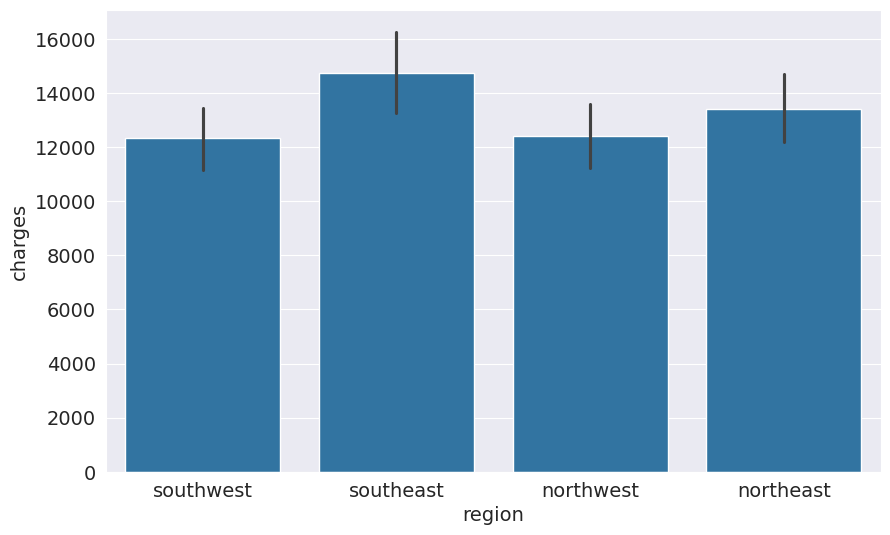

In [ ]:
# one-hot encoding

sns.barplot(data=medical_df, x='region', y='charges');

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_num,sex_num,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0.0,0.0,0.0,1.0


In [ ]:
input_cols = ['age', 'bmi', 'children', 'northeast', 'northwest', 'southeast', 'southwest', 'sex_num', 'smoker_num']
inputs_1, target = medical_df[input_cols], medical_df.charges

model.fit(inputs_1, target)

predictions_1 = model.predict(inputs_1)

In [ ]:
loss_1 = rmse(target, predictions_1)
loss_1 # very less reduction in loss

6041.6796511744515

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515,   587.00923503,
         234.0453356 ,  -448.01281436,  -373.04175627,   131.3143594 ,
       23848.53454191])

In [ ]:
model.intercept_

8335.168856016717

In [ ]:
import numpy as np

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,northeast,587.009235
4,northwest,234.045336
5,southeast,-448.012814
6,southwest,-373.041756
7,sex_num,131.314359
8,smoker_num,23848.534542
9,1,-12656.862171


northeast has more weight than bmi, because bmi ranges from 15 to 40 and northeast ranges from 0 to 1. We need to feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_num', 'sex_num', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
inputs_2 = np.concatenate((scaled_inputs, categorical_data), axis=1)
target = medical_df.charges

model.fit(inputs_2, target)

predictions_2 = model.predict(inputs_2)

In [ ]:
loss_2 = rmse(target, predictions_2)
loss_2

6041.6796511744515

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_num,23848.534542
9,1,8335.168856
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_num,131.314359
8,southwest,-373.041756
7,southeast,-448.012814


all the weights are assigned.

In [ ]:
from sklearn.model_selection import train_test_split

inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_2, target, test_size=0.1)

model.fit(inputs_train, target_train)

LinearRegression()

In [ ]:
predictions_test = model.predict(inputs_test)

loss_3_test = rmse(target_test, predictions_test)
loss_3_test

5900.054157111498

In [ ]:
predictions_train = model.predict(inputs_train)

loss_3_train = rmse(target_train, predictions_train)
loss_3_train

6062.676453444253